In [1]:
# Objective: To identify what are the factors associated with high medical cost

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [5]:
# to import the dataset
df = pd.read_csv("C:/Users/miche/Desktop/machine_learning/insurance.csv")

In [7]:
# to check for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# to check for any duplicated values
duplicates = df[df.duplicated()]

In [11]:
duplicates

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [13]:
# to remove duplicated row
df = df.drop_duplicates(keep='first', inplace=False)

In [17]:
# to check if variables are in their correct data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [19]:
# to display variables in the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


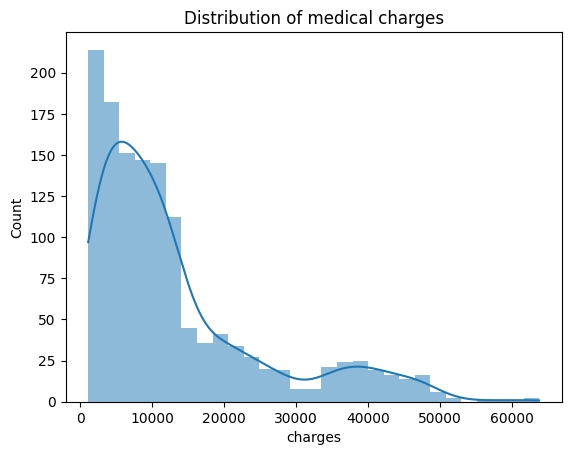

In [25]:
# to plot a histogram of medical cost: 'charges'
# most the medical costs are at the lower end
sns.histplot(data=df, x='charges', edgecolor=None, kde=True)
plt.title('Distribution of medical charges')
plt.show()

In [29]:
# youngest = 18 years
# oldest = 64 years
df['age'].describe()

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

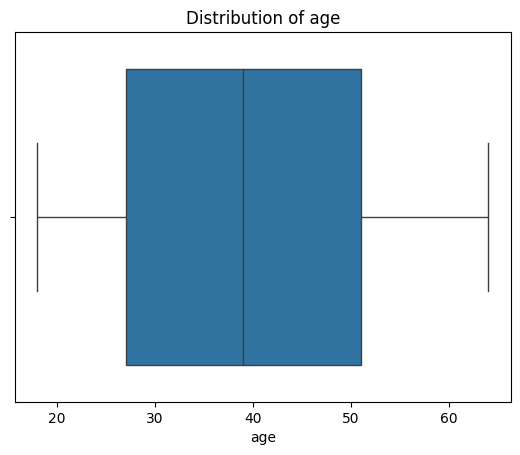

In [31]:
# average age = 39 years
sns.boxplot(data=df, x='age')
plt.title('Distribution of age')
plt.show()

In [37]:
# to write a def custom function for age, then apply() it to a new variable
def age_categories(s):
    if 18 <= s <= 30:
        return "18 to 30"
    elif 31 <= s <= 43:
        return "31 to 43"
    elif 44 <= s <= 56:
        return "44 to 56"
    elif  s >= 57:
        return "above 57"

In [39]:
# to apply() custom function and create a new variable: 'age_categories'
df['age_categories'] = df['age'].apply(age_categories)

In [43]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_categories
0,19,female,27.900,0,yes,southwest,16884.92400,18 to 30
1,18,male,33.770,1,no,southeast,1725.55230,18 to 30
2,28,male,33.000,3,no,southeast,4449.46200,18 to 30
3,33,male,22.705,0,no,northwest,21984.47061,31 to 43
4,32,male,28.880,0,no,northwest,3866.85520,31 to 43


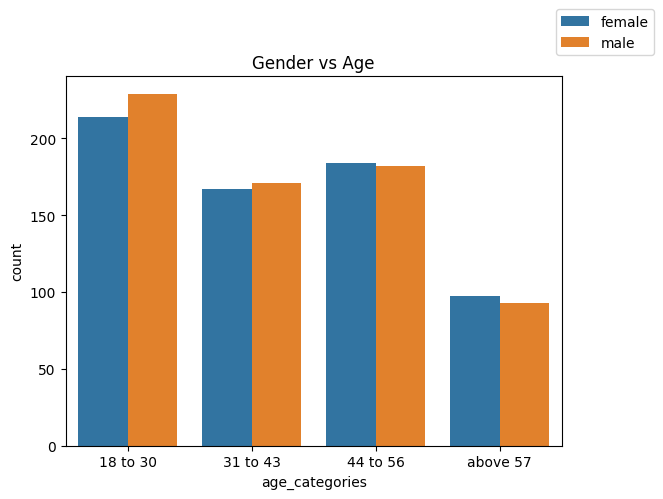

In [60]:
sns.countplot(data=df, x='age_categories', hue='sex')
plt.title("Gender vs Age")
plt.legend(bbox_to_anchor=(1.2,1.2))
plt.show()

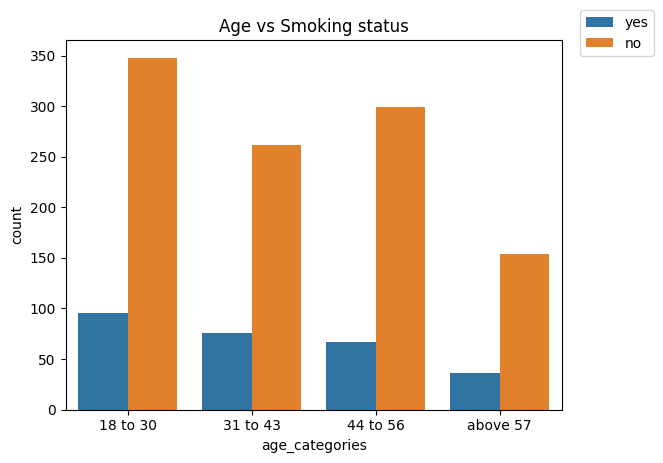

In [68]:
# smokers tend to be younger, 18 to 30 years
sns.countplot(data=df, x='age_categories', hue='smoker')
plt.title("Age vs Smoking status")
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

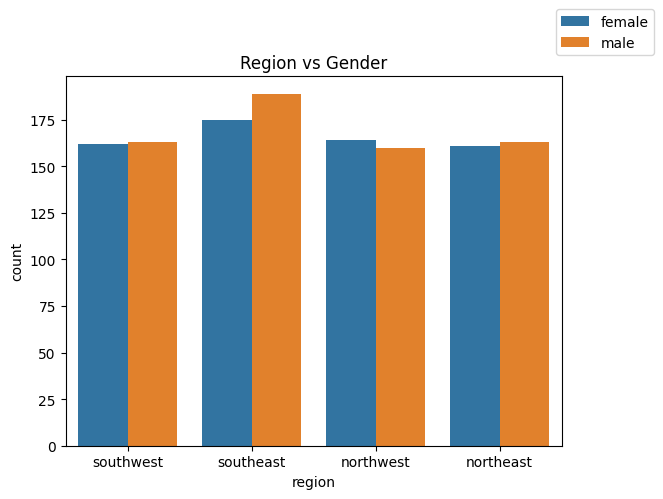

In [72]:
sns.countplot(data=df, x='region', hue='sex')
plt.title("Region vs Gender")
plt.legend(bbox_to_anchor=(1.2,1.2))
plt.show()

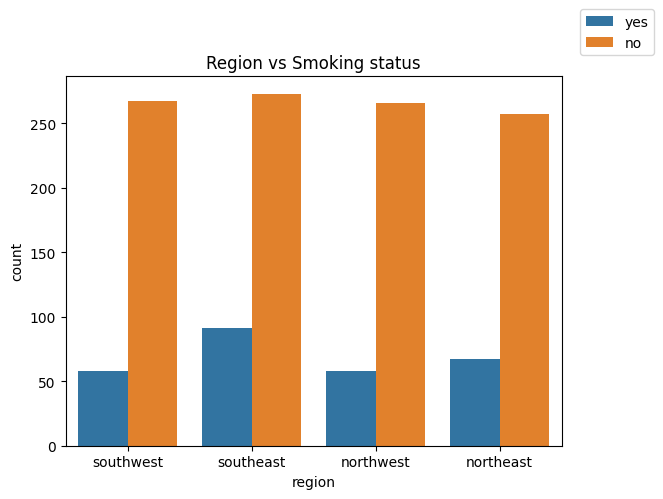

In [74]:
# there are more smokers in the southeast region
sns.countplot(data=df, x='region', hue='smoker')
plt.title("Region vs Smoking status")
plt.legend(bbox_to_anchor=(1.2,1.2))
plt.show()

In [80]:
num_corr = df.select_dtypes(['int', 'float']).corr()

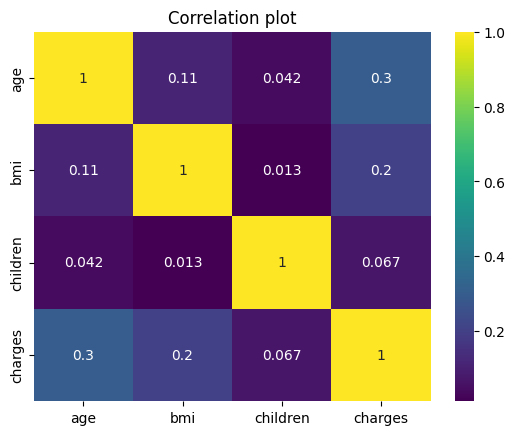

In [84]:
# to plot a correlation plot of all numerical values
sns.heatmap(data=num_corr, annot=True, cmap='viridis')
plt.title('Correlation plot')
plt.show()

In [88]:
# Age is highly correlated to medical cost charges
df.select_dtypes(['int', 'float']).corr()['charges'].sort_values(ascending=False)

charges     1.000000
age         0.298308
bmi         0.198401
children    0.067389
Name: charges, dtype: float64

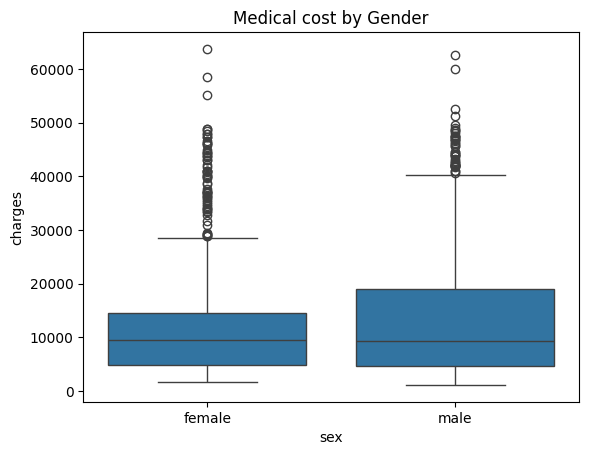

In [90]:
# males have higher medical cost compared to females
sns.boxplot(data=df, x='sex', y='charges')
plt.title('Medical cost by Gender')
plt.show()

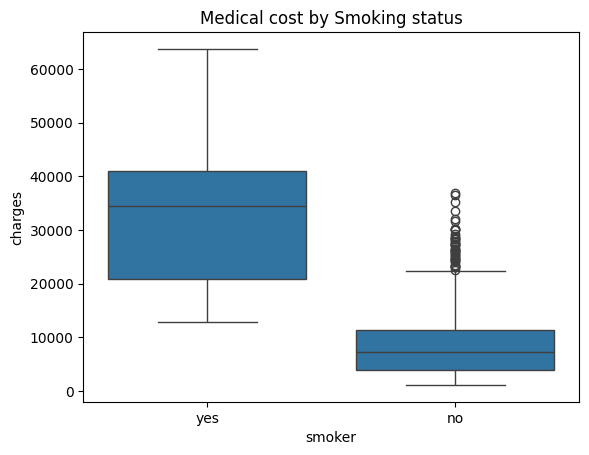

In [94]:
# Smokers have a higher medical cost compared to non-smokers
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Medical cost by Smoking status')
plt.show()

C:\Users\miche\AppData\Local\Temp\ipykernel_13668\3438528298.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='region', y='charges', palette='Set2')


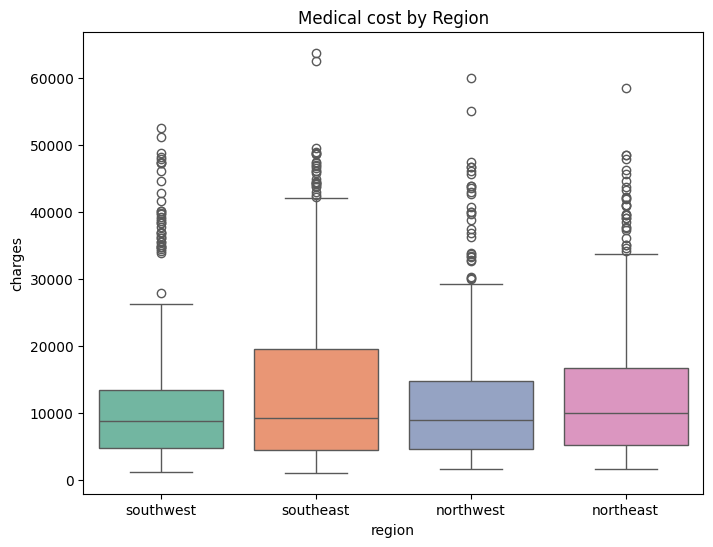

In [100]:
# People residing in the Southeast region has a higher medical cost
plt.figure(figsize=(8,6), dpi=100)
sns.boxplot(data=df, x='region', y='charges', palette='Set2')
plt.title('Medical cost by Region')
plt.show()

In [104]:
pd.DataFrame(df['children'].value_counts())

,count
children,
0,573
1,324
2,240
3,157
4,25
5,18


In [106]:
# to define X and y
X = df.drop(['age','charges'], axis=1)

In [108]:
# to convert all categorical variables to dummy values
X = pd.get_dummies(X, drop_first=True)

In [110]:
X

,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_categories_31 to 43,age_categories_44 to 56,age_categories_above 57
0,27.900,0,False,True,False,False,True,False,False,False
1,33.770,1,True,False,False,True,False,False,False,False
2,33.000,3,True,False,False,True,False,False,False,False
3,22.705,0,True,False,True,False,False,True,False,False
4,28.880,0,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,30.970,3,True,False,True,False,False,False,True,False
1334,31.920,0,False,False,False,False,False,False,False,False
1335,36.850,0,False,False,False,True,False,False,False,False
1336,25.800,0,False,False,False,False,True,False,False,False


In [112]:
y = df['charges']

In [114]:
from sklearn.model_selection import train_test_split

In [124]:
from sklearn.preprocessing import StandardScaler

In [126]:
# testing data = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [128]:
# to initialize an instance of scaler
scaler = StandardScaler()

In [130]:
scaled_X_train = scaler.fit_transform(X_train)

In [132]:
scaled_X_test = scaler.transform(X_test)

In [134]:
from sklearn.tree import DecisionTreeRegressor

In [136]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [138]:
from xgboost import XGBRegressor

In [140]:
from sklearn.svm import SVR

In [142]:
from sklearn.neighbors import KNeighborsRegressor

In [144]:
from sklearn.linear_model import LinearRegression

In [146]:
dt = DecisionTreeRegressor()

In [154]:
# to fit the decision tree modelinto the training data
dt.fit(scaled_X_train, y_train)

DecisionTreeRegressor()

In [156]:
# to predict on X testing data
dt_pred = dt.predict(scaled_X_test)

In [160]:
dt_pred[:10]

array([ 4667.60765 ,  7323.734819,  3260.199   ,  8023.13545 ,
        4753.6368  ,  2483.736   , 13635.6379  ,  5031.26955 ,
       10797.3362  ,  1621.8827  ])

In [162]:
# to predict on X training data
dt_train_pred = dt.predict(scaled_X_train)

In [164]:
dt_train_pred

array([ 7731.85785 ,  7882.429475,  9058.7303  , ..., 11356.6609  ,
        1633.0444  ,  8782.469   ])

In [166]:
# to import evaluation metrics
from sklearn.metrics import r2_score, mean_squared_error

In [168]:
# MSE for Decision tree test model
mean_squared_error(y_test, dt_pred)

45005222.4867693

In [170]:
# MSE for Decision tree train model
mean_squared_error(y_train, dt_train_pred)

334298.0746957483

In [174]:
print('Decision Tree_test_RMSE:', np.sqrt(mean_squared_error(y_test, dt_pred)))  # Decision tree RMSE test model = 6708.6
print('Decision Tree_train_RMSE:', np.sqrt(mean_squared_error(y_train, dt_train_pred)))

Decision Tree_test_RMSE: 6708.593182386998
Decision Tree_train_RMSE: 578.185156066591


In [176]:
# to define an empty testing & training score list
testing_score = []
training_score = []

In [178]:
test = r2_score(y_test, dt_pred)*100
train = r2_score(y_train, dt_train_pred)*100
testing_score.append(test)
training_score.append(train)

print(f"r2_score of {dt} model on testing data is :", test)
print(f"r2_score of {dt} model on training data is :", train)

r2_score of DecisionTreeRegressor() model on testing data is : 70.33768695931937
r2_score of DecisionTreeRegressor() model on training data is : 99.76982889150665


In [180]:
rf = RandomForestRegressor()

In [182]:
rf.fit(scaled_X_train, y_train)

RandomForestRegressor()

In [192]:
# to predict on X testing data
rf_pred = rf.predict(scaled_X_test)
rf_pred[:10]

array([ 5867.6199672 ,  3777.1261098 ,  6655.6523677 ,  9252.0381389 ,
        6163.586436  ,  2011.1382645 , 13676.564707  ,  6027.616956  ,
       10481.4055035 ,  2737.75716053])

In [194]:
# to predict on the X training data
rf_train_pred = rf.predict(scaled_X_train)
rf_train_pred[:10]

array([ 9366.3097568 ,  6692.75685982,  8950.4132485 ,  2966.28871   ,
       11720.685794  ,  5913.8783039 ,  3341.1920766 ,  5378.3799185 ,
        5499.8910995 ,  7243.9513606 ])

In [198]:
# MSE for Random Forest regressor test model
mean_squared_error(y_test, rf_pred)

26786726.021091007

In [200]:
# MSE for Random Forest regressor train model
mean_squared_error(y_train, rf_train_pred)

3729100.4566590786

In [202]:
print('Random Forest_test_RMSE:', np.sqrt(mean_squared_error(y_test, rf_pred)))  # Random Forest RMSE test model = 5175.6
print('Random Forest_train_RMSE:', np.sqrt(mean_squared_error(y_train, rf_train_pred)))

Random Forest_test_RMSE: 5175.589437068111
Random Forest_train_RMSE: 1931.0878945970012


In [204]:
test = r2_score(y_test, rf_pred)*100
train = r2_score(y_train, rf_train_pred)*100
testing_score.append(test)
training_score.append(train)

print(f"r2_score of {rf} model on testing model is :", test)
print(f"r2_score of {rf} model on training model is :", train)

r2_score of RandomForestRegressor() model on testing model is : 82.34524331468127
r2_score of RandomForestRegressor() model on training model is : 97.43243754372956


In [206]:
ada = AdaBoostRegressor()

In [208]:
ada.fit(scaled_X_train, y_train)

AdaBoostRegressor()

In [210]:
# to predict on the X testing data
ada_pred = ada.predict(scaled_X_test)
ada_pred[:10]

array([ 7007.17261333,  7007.17261333,  7007.17261333, 11757.72508317,
        7007.17261333,  7007.17261333, 16319.335702  ,  7007.17261333,
       13300.52442408,  7007.17261333])

In [212]:
# to predict on the X training data
ada_train_pred = ada.predict(scaled_X_train)
ada_train_pred[:10]

array([14079.06567163,  7007.17261333, 13300.52442408,  7007.17261333,
       15048.92217859,  7007.17261333,  7007.17261333,  7007.17261333,
        7007.17261333,  7007.17261333])

In [214]:
print('AdaBoost_test_RMSE:', np.sqrt(mean_squared_error(y_test, ada_pred)))  # AdaBoost regressor RMSE test model = 5676.3
print('AdaBoost_train_RMSE:', np.sqrt(mean_squared_error(y_train, ada_train_pred)))

AdaBoost_test_RMSE: 5676.323685566124
AdaBoost_train_RMSE: 4963.43578030419


In [216]:
test = r2_score(y_test, ada_pred)*100
train = r2_score(y_train, ada_train_pred)*100
testing_score.append(test)
training_score.append(train)

print(f"r2_score of {ada} model on testing data is : ", test)
print(f"r2_score of {ada} model on training data is : ", train)

r2_score of AdaBoostRegressor() model on testing data is :  78.76381959320908
r2_score of AdaBoostRegressor() model on training data is :  83.03781685500812


In [218]:
gb = GradientBoostingRegressor()

In [220]:
gb.fit(scaled_X_train, y_train)

GradientBoostingRegressor()

In [224]:
# to predict on the X testing data
gb_pred = gb.predict(scaled_X_test)
gb_pred[:10]

array([ 6885.18980107,  3269.68469794,  4990.06802305,  9478.31601895,
        6316.91460438,  3811.44176068, 15271.26706557,  7109.33550901,
       11486.36392024,  4249.84070402])

In [226]:
# to predict on the X training data
gb_train_pred = gb.predict(scaled_X_train)
gb_train_pred[:10]

array([10614.10721699,  4183.27538881,  9947.98360584,  4044.74363605,
       12547.79281293,  6940.42329725,  5280.01232065,  5371.72559303,
        6850.90692765,  6850.14509722])

In [228]:
# MSE on Gradient Boost test model
mean_squared_error(y_test, gb_pred)

23797590.794586316

In [230]:
# MSE on Gradient Boost train model
mean_squared_error(y_train, gb_train_pred)

15042996.945239887

In [232]:
print('Gradient Boost_test_RMSE:', np.sqrt(mean_squared_error(y_test, gb_pred)))  # Gradient Boost regressor RMSE test = 4878.3
print('Gradient Boost_train_RMSE:', np.sqrt(mean_squared_error(y_train, gb_train_pred)))

Gradient Boost_test_RMSE: 4878.2774413297075
Gradient Boost_train_RMSE: 3878.5302558108124


In [234]:
test = r2_score(y_test, gb_pred)*100
train = r2_score(y_train, gb_train_pred)*100
testing_score.append(test)
training_score.append(train)

print(f"r2_score of {gb} model on testing data is :", test)
print(f"r2_score of {gb} model on training data is :", train)

r2_score of GradientBoostingRegressor() model on testing data is : 84.31534055918604
r2_score of GradientBoostingRegressor() model on training data is : 89.64258682883754


In [236]:
xgb = XGBRegressor()

In [238]:
xgb.fit(scaled_X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [248]:
# to predict on the X testing data
xgb_pred = xgb.predict(scaled_X_test)
xgb_pred[:10]

array([ 6284.77  ,  3740.5083,  7878.501 ,  9590.865 ,  5534.866 ,
        2986.417 , 14760.622 ,  4900.643 , 10910.879 ,  3255.7893],
      dtype=float32)

In [244]:
# to predict on the X training data
xgb_train_pred = xgb.predict(scaled_X_train)
xgb_train_pred[:10]

array([ 7930.3916,  6724.9697,  8829.809 ,  2945.1777, 11123.268 ,
        5929.8916,  2742.3542,  5315.977 ,  4913.671 ,  6887.847 ],
      dtype=float32)

In [250]:
# XGBoost MSE test model
mean_squared_error(y_test, xgb_pred)

30473214.250931542

In [252]:
# XGBoost MSE train model
mean_squared_error(y_train, xgb_train_pred)

1407857.2061613514

In [254]:
print('XGBoost test_RMSE:', np.sqrt(mean_squared_error(y_test, xgb_pred)))   # XGBoost regressor RMSE test model = 5520.3
print('XGBoost train_RMSE:', np.sqrt(mean_squared_error(y_train, xgb_train_pred)))

XGBoost test_RMSE: 5520.254908147951
XGBoost train_RMSE: 1186.531586668198


In [256]:
test = r2_score(y_test, xgb_pred)*100
train = r2_score(y_train, xgb_train_pred)*100
testing_score.append(test)
training_score.append(train)

print(f"r2_score of {xgb} model on testing data is:", test)
print(f"r2_score of {xgb} model on training data is:", train)

r2_score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) model on testing data is: 79.91553045354695
r2_score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_r

In [276]:
svr = SVR()

In [278]:
svr.fit(scaled_X_train, y_train)

SVR()

In [280]:
# to predict on X testing data
svr_pred = svr.predict(scaled_X_test)
svr_pred[:10]

array([9385.09492943, 9394.83100165, 9388.05112698, 9445.00466315,
       9417.82921784, 9395.70520411, 9485.85162477, 9384.68144527,
       9449.54029285, 9396.31728407])

In [282]:
# to predict on X training data
svr_train_pred = svr.predict(scaled_X_train)
svr_train_pred[:10]

array([9450.25649981, 9409.32095098, 9450.60195459, 9401.65423884,
       9462.28633678, 9397.12393886, 9401.8997199 , 9377.49205305,
       9381.38150998, 9398.81924491])

In [284]:
# Support Vector machine regressor MSE test model
mean_squared_error(y_test, svr_pred)

164311410.40452728

In [286]:
# Support Vector machine regressor MSE train model
mean_squared_error(y_train, svr_train_pred)

159863465.25304058

In [288]:
print('Support Vector machine_test_RMSE:', np.sqrt(mean_squared_error(y_test, svr_pred))) # Support Vector Machine test RMSE = 12818.4
print('Support Vector machine_train_RMSE:', np.sqrt(mean_squared_error(y_train, svr_train_pred)))

Support Vector machine_test_RMSE: 12818.401242141208
Support Vector machine_train_RMSE: 12643.712479056165


In [290]:
test = r2_score(y_test, svr_pred)*100
train = r2_score(y_train, svr_train_pred)*100
testing_score.append(test)
training_score.append(train)

print(f"r2_score of {svr} model on testing data is:", test)
print(f"r2_score of {svr} model on training data is:", train)

r2_score of SVR() model on testing data is: -8.295353789388749
r2_score of SVR() model on training data is: -10.069287830538176


In [292]:
knn = KNeighborsRegressor()

In [294]:
knn.fit(scaled_X_train, y_train)

KNeighborsRegressor()

In [296]:
# to predict on the X testing data
knn_pred = knn.predict(scaled_X_test)
knn_pred[:10]

array([ 5041.60346  ,  7163.5474638,  5612.38949  ,  9176.3924   ,
        2801.70018  ,  2231.26843  , 17237.939022 ,  6217.06153  ,
       10492.01627  ,  6140.33999  ])

In [298]:
# to predict on the X training data
knn_train_pred = knn.predict(scaled_X_train)
knn_train_pred[:10]

array([ 8993.95451 ,  4302.11015 ,  8709.70848 ,  2452.8003  ,
       17745.417692,  8137.812134,  6316.528018,  5883.81764 ,
        5610.5403  ,  6504.25732 ])

In [300]:
# MSE on KNN regressor test model
mean_squared_error(y_test, knn_pred)

35322136.91981977

In [302]:
# MSE on KNN regressor train model
mean_squared_error(y_train, knn_train_pred)

22137706.61025969

In [304]:
print('KNN regressor_test_RMSE:', np.sqrt(mean_squared_error(y_test, knn_pred))) # KNN Regressor RMSE test model = 5943.2
print('KNN regressor_train_RMSE:', np.sqrt(mean_squared_error(y_train, knn_train_pred)))

KNN regressor_test_RMSE: 5943.242963216276
KNN regressor_train_RMSE: 4705.072434114027


In [306]:
test = r2_score(y_test, knn_pred)*100
train = r2_score(y_train, knn_train_pred)*100
testing_score.append(test)
training_score.append(train)

print(f"r2_score of {knn} model on testing data is:", test)
print(f"r2_score of {knn} model on training data is: ", train)

r2_score of KNeighborsRegressor() model on testing data is: 76.71967330259301
r2_score of KNeighborsRegressor() model on training data is:  84.75773312597866


In [308]:
lr = LinearRegression()

In [310]:
lr.fit(scaled_X_train, y_train)

LinearRegression()

In [312]:
# to predict on X testing data
lr_pred = lr.predict(scaled_X_test)
lr_pred[:10]

array([ 9549.31411469,  3949.80549899,  3531.89853882, 12092.27224694,
        8341.9732103 ,  2054.57265084, 16253.9752243 ,  6417.80087498,
       11356.40735711,  4767.01877426])

In [316]:
# to predict on X training data
lr_train_pred = lr.predict(scaled_X_train)
lr_train_pred[:10]

array([12011.31197498,  6393.41952079, 15445.47257396,  6041.87148369,
       14993.71385937,  9394.33511747,  5541.08223735,  5623.26257303,
        6970.78003232,  3275.14007993])

In [319]:
# MSE for Linear Regression test model
mean_squared_error(y_test, lr_pred)

37687583.36971073

In [321]:
# MSE for Linear Regression train model
mean_squared_error(y_train, lr_train_pred)

36414911.86175203

In [325]:
print('Linear Regression_test_RMSE:', np.sqrt(mean_squared_error(y_test, lr_pred))) # Linear Regression RMSE test model = 6139
print('Linear Regression_train_RMSE:', np.sqrt(mean_squared_error(y_train, lr_train_pred)))

Linear Regression_test_RMSE: 6139.02136905474
Linear Regression_train_RMSE: 6034.476933566988


In [327]:
test = r2_score(y_test, lr_pred)*100
train = r2_score(y_train, lr_train_pred)*100
testing_score.append(test)
training_score.append(train)

print(f"r2_score of {lr} model on testing data is:", test)
print(f"r2_score of {lr} model on training data is:", train)

r2_score of LinearRegression() model on testing data is: 75.16064061259222
r2_score of LinearRegression() model on training data is: 74.92758330560066


In [329]:
# RMSE on the Gradient Boost Regressor model is the smallest at = 4878.3
# the smaller the root mean squared error, the more accurate the prediction model

In [335]:
gb.feature_importances_

array([1.93444087e-01, 8.70907221e-03, 1.47037412e-03, 6.95974324e-01,
       4.51334430e-04, 1.35617248e-03, 1.27470741e-03, 5.07838815e-03,
       4.33338898e-02, 4.89076505e-02])

In [339]:
pd.DataFrame(data= gb.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

,Importance
smoker_yes,0.695974
bmi,0.193444
age_categories_above 57,0.048908
age_categories_44 to 56,0.043334
children,0.008709
age_categories_31 to 43,0.005078
sex_male,0.001470
region_southeast,0.001356
region_southwest,0.001275
region_northwest,0.000451


In [343]:
# to read into a new dataframe
gbr_imp = pd.DataFrame(data= gb.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

C:\Users\miche\AppData\Local\Temp\ipykernel_13668\3820553788.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gbr_imp, y=gbr_imp.index, x='Importance', palette='rocket_r')


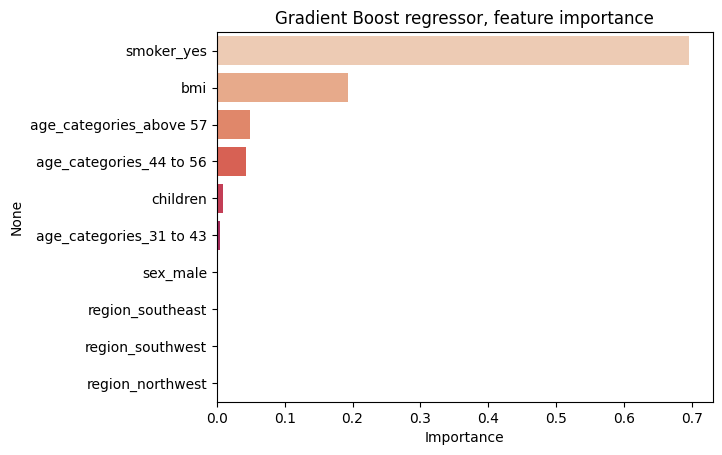

In [351]:
# Predictor of high insurance claims: 1)Smoker_yes, 2)BMI, 3)57 years and above, 4) 44 to 56 years
# to visualise in a barplot
sns.barplot(data=gbr_imp, y=gbr_imp.index, x='Importance', palette='rocket_r')
plt.title('Gradient Boost regressor, feature importance', size=12)
plt.show()